# init

In [ ]:
# init
import numpy as np
from scipy import stats
from scipy.stats import variation
import matplotlib.pyplot as plt
from scipy.optimize import fmin

def linearReg(x,y):
    """
    linearReg: curve fitting using linear regression 
    
    linearReg(x,y): Least squares fit of a straight line to data 
    input:
      x = independent variable
      y = dependent variable
    output:
      a = vector (regression line slope a[0] and intercept a[1])
      r2 = coefficient of determination
      Syx = standard error of the estimate
      plt = plot handle (can be used to customize the plot outside the function)
    """
    import numpy as np
    # check if x and y vectors have the same length. If not show an error message
    assert x.shape[0] == y.shape[0], "x and y lengths are not the same"
    n = x.shape[0]   #number of elements in x
    # calculate the summations
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x*x)
    sum_xy = np.sum(x*y)
    sum_y2 = np.sum(y*y)
    a = np.zeros(2, float)  #initiate a with zeros
    a[0] = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    a[1] = sum_y / n - a[0] * sum_x / n
    r2 = ((n * sum_xy - sum_x*sum_y) / np.sqrt(n * sum_x2 - sum_x**2) / np.sqrt(n * sum_y2 - sum_y**2))**2
    Sr = np.sum((y - a[0] * x -a[1])**2)  # total error of the estimate
    Syx = np.sqrt(Sr / (n - 2))
    # plot the regression line along with the data
    import matplotlib.pyplot as plt
    xp = np.linspace(np.min(x), np.max(x),2)
    yp = a[0] * xp + a[1]
    plt.plot(xp,yp)    #regression line
    plt.plot(x,y,'o')  #data
    return a, r2, Syx, plt


# Q1

Given the data:
\begin{align*}
& 0.90 \qquad 1.42 \qquad 1.30 \qquad 1.55 \qquad 1.63 \qquad 1.32 \qquad 1.35 \qquad 1.47 \qquad 1.95 \qquad 1.66 \\
& 1.96 \qquad 1.47 \qquad 1.92 \qquad 1.35 \qquad  1.05 \qquad  1.85 \qquad 1.74 \qquad 1.65 \qquad 1.78 \qquad 1.71 \\
& 2.29 \qquad 1.82 \qquad 2.06 \qquad 2.14 \qquad 1.27
\end{align*}

1. Use hand calculations to determine the mean, median, mode, range, standard deviation, variance, and coefficient of variation. 
2. Compare the Part 1 results with those obtained from python. Construct a histogram from the data using python.


Mean:  1.6244000000000003
Median:  1.65
Mode:  [1.35]
range= 1.3900000000000001
Standard Deviation:  0.3325306602405258
Variance:  0.11057663999999999
Coefficient of variation:  0.2047098376265241
0.06807229746367888


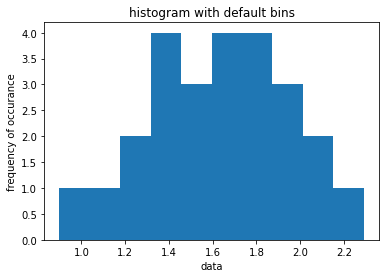

In [ ]:
# Q1 Answer
a = np.array([.90, 1.42, 1.30, 1.55, 1.63, 1.32, 1.35, 1.47, 1.95, 1.66, 1.96, 1.47, 1.92, 1.35, 1.05, 1.85, 1.74, 1.65, 1.78, 1.71, 2.29, 1.82, 2.06, 2.14, 1.27], float)
mean = np.mean(a)
median = np.median(a)
mode = stats.mode(a)
range = np.ptp(a)
std = np.std(a)
variance = np.var(a)
covariation = variation (a)
 
print('Mean: ', mean)
print('Median: ', median)
print('Mode: ', mode[0])
print('range=', range) 
print('Standard Deviation: ', std)
print('Variance: ', variance)
print('Coefficient of variation: ', covariation)
print(variance/mean)

# histrogram with default number of bins
b = plt.hist(a)      
plt.xlabel('data')
plt.ylabel('frequency of occurance')
plt.title('histogram with default bins')
plt.show();

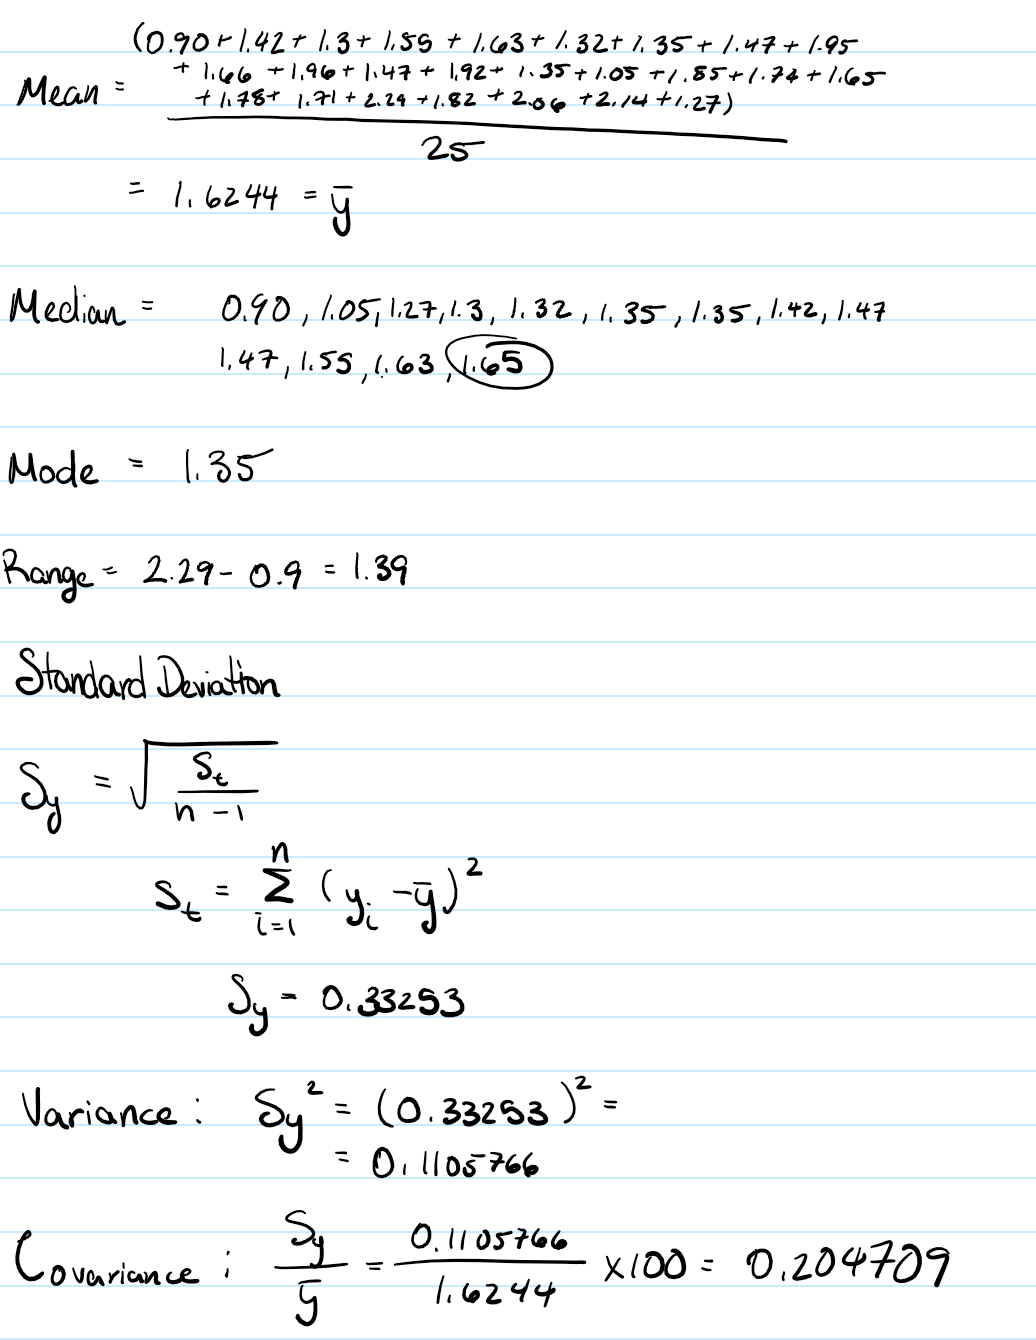

# Q2

A transportation engineering study was conducted to determine the proper design of bike lanes. Data were gathered on bike-lane widths and average distance between bikes and passing cars. The data from $9$ streets are
\begin{align*}
&\rm{Distance\ , m}  &&\qquad 2.4 \qquad 1.5 \qquad 2.4 \qquad 1.8 \qquad 1.8 \qquad 2.9 \qquad 1.2 \qquad 3  & 1.2 \\
&\rm{Lane\ width\ , m} &&\qquad 2.9 \qquad 2.1 \qquad 2.3 \qquad 2.1 \qquad 1.8 \qquad 2.7 \qquad 1.5 \qquad 2.9  & 1.5
\end{align*}


1. Fit a straight line to the data with linear regression. What is the equation of the line for lane width versus distance. Use the function `polyfit` to check you result. Check the coefficient of determination $r^{2}$ and compare the standard error of the estimate ($S_{y/x}$) with the standard deviation to decide if the line represents the data well. Also, plot the data along with the regression line and check if the fit is reasonable.
2. If the minimum safe average distance between bikes and passing cars is considered to be $1.8$ m, determine the corresponding lane width.




a =  [0.73349197 0.71671624]
Linear Regression line: y =  0.7334919690660323 + x 0.7167162403331349
The coefficient of determination (r^2) = 0.8374033313503869
Standard error of the estimate (Sy/x) = 0.23610893513650852
Standard deviation =  0.5163977794943222
Standard deviation (Sy) =  0.5477225575051661 > Sy/x : the fit has merit

Comparing with polyfit:
polyfit coefficients:  [0.73349197 0.71671624]

Part 2:
2.023581201665675


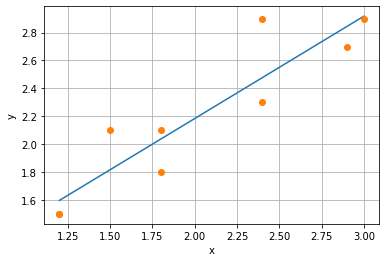

In [ ]:
# Q2 Answer
x = np.array([2.4, 1.5, 2.4, 1.8, 1.8, 2.9, 1.2, 3.0, 1.2], float)
y = np.array([2.9, 2.1, 2.3, 2.1, 1.8, 2.7, 1.5, 2.9, 1.5], float)
a, r2, Syx, plt = linearReg(x,y)

print()
print('a = ',a)
print('Linear Regression line: y = ', a[0],'+ x', a[1])
print('The coefficient of determination (r^2) =',r2)
print('Standard error of the estimate (Sy/x) =', Syx)
print('Standard deviation = ', np.std(y))
print('Standard deviation (Sy) = ', Sy, '> Sy/x : the fit has merit')
print()
print('Comparing with polyfit:')
check = np.polyfit(x,y,1)
print('polyfit coefficients: ', check)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
print()

#Part2
print('Part 2:')
distance = 1.8
atx = a[0] + distance * a[1] 
print(atx)

# Q3

The mast of a sailboat is constructed of an experimental aluminum alloy. Tests were performed to define the relationship between stress and strain. The test results are
\begin{align*}
&\rm{Strain\,[cm/cm]} &&0.0032  &&0.0045 &&0.0055 &&0.0016 && 0.0085 &&\ \ \ \ 0.0005\\
&\rm{Stress}\, [N/cm^{2}] &&4970  &&5170 &&5500 &&3590 && 6900 &&\ \ \ \  1240
\end{align*}
Use the `polyfit` function to find a **proper** mathematical expression to describe the stress-strain relationship (i.e., a phycially sound expression not leading to negative stress or strain values). Plot this expression along with the data to determine if the regression line is sufficiently accurate to represent the data and sound from engineering perspective. The stress can be substituted into this expression to determine the mast's deflection, which is defined as the strain multiplied by $L$, where $L$ is the mast's length. If the stress on the mast caused by wind is $2300$ $\rm{N/cm^2}$, use the curve fit to estimate the deflection of a $9$-m mast ($L=9$ $m$).


a =  [624867.12836205   2083.0270575 ]
Linear Regression line: y =  624867.1283620547 + x 2083.0270574971833
The coefficient of determination (r^2) = 0.8568450351687674
Standard error of the estimate (Sy/x) = 821.6274656445571
Standard deviation =  1773.0709392338356
Standard deviation (Sy) =  0.5477225575051661 < Sy/x : the fit has no merit

Comparing with polyfit:
polyfit coefficients:  [624867.12836205   2083.0270575 ]

Deflection when strain = 2300 and L = 9:  -298.8761601157918


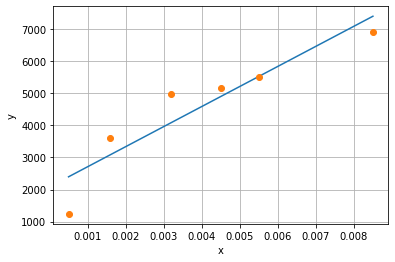

In [ ]:
# Q3 Answer
x1 = np.array([0.0032, 0.0045, 0.0055, 0.0016, 0.0085, 0.0005])
y1 = np.array([4970., 5170., 5500., 3590., 6900., 1240.])
a1, r22, Syx1, plt1 = linearReg(x1,y1)
print()
print('a = ',a1)
print('Linear Regression line: y = ', a1[0],'+ x', a1[1])
print('The coefficient of determination (r^2) =',r22)
print('Standard error of the estimate (Sy/x) =', Syx1)
print('Standard deviation = ', np.std(y1))
print('Standard deviation (Sy) = ', Sy, '< Sy/x : the fit has no merit')
print()
print('Comparing with polyfit:')
check = np.polyfit(x1,y1,1)
print('polyfit coefficients: ', check)
plt1.xlabel('x')
plt1.ylabel('y')
plt1.grid(True)
print()

y2=2300
function=(y2-a1[0])/a1[1]
deflection=function * 9
print('Deflection when strain = 2300 and L = 9: ', function)

# Q4

Andrade's equation has been proposed as a model of the effect of temperature on viscosity:
\begin{equation}
\mu=D e^{B/T}
\end{equation}
where $\mu$ $[10^{-3}\,\rm{N.s/m^{2}]}$ is dynamic viscosity of water, $T$ [K] is  the absolute temperature, and $D$ and $B$ are parameters. Fit this model to the following data for water:
\begin{align*}
&T\,\rm{[K]}&&273 &&278 &&283 &&293 &&303 &&\ \ \ \ 313 \\
&\mu\,[10^{-3}\rm{N.s/m^{2}]} &&1.787 &&1.519 &&1.307 &&1.002 &&0.7975 &&\ \ \ \ 0.6529
\end{align*}
Show the accuracy of the fit by plotting the regression line along with the data. Report the $r^2$ value and decide whether the fit is good.


a =  [2148.5446081    -7.31053326]
Linear Regression line: y =  2148.5446080971296 + x -7.310533263448229
The coefficient of determination (r^2) = 0.9980331257922471
Standard error of the estimate (Sy/x) = 0.019245457189549526
Standard deviation =  0.3543188929399399
Standard deviation (Sy) =  0.5477225575051661 > Sy/x : the fit has merit

Comparing with polyfit:
polyfit coefficients:  [2148.5446081    -7.31053326]
d=  0.0006684604914631794



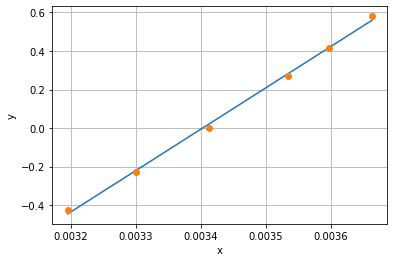

In [ ]:
# Q4 Answer
x3=np.array([273., 278., 283., 293., 303., 313.], float)
y3=np.array([1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529],float)
x4=1/x3
y4=np.log(y3)
a, r2, Syx, plt = linearReg(x4,y4)
print()
print('a = ',a)
print('Linear Regression line: y = ', a[0],'+ x', a[1])
print('The coefficient of determination (r^2) =',r2)
print('Standard error of the estimate (Sy/x) =', Syx)
print('Standard deviation = ', np.std(y4))
print('Standard deviation (Sy) = ', Sy, '> Sy/x : the fit has merit')
print()
print('Comparing with polyfit:')
check = np.polyfit(x4,y4,1)
print('polyfit coefficients: ', check)
import math
from math import exp
d = math.exp(a[1])
print('d= ', d)

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
print()




# Q5

Use the data below to find the constants $a_{1}$ and $a_{2}$ in the equation of state:
\begin{equation}
\frac{PV}{RT}-1=\frac{a_{1}}{V}+\frac{a_{2}}{V^{2}}
\end{equation}
where $R = 82.05$\, $\rm{[mL.atm/gmol.K]}$ and $T = 303$\,[K].
\begin{align*}
&P\, \rm{[atm]} &&0.985 &&1.108 &&1.363 &&1.631\\
&V\,\rm{[mL]} &&25,000 &&22,200 &&18,000 &&15,000
\end{align*}

Use the general linear least-square to find $a_{1}$ and $a_{2}$. Check the accuracy of the fits by plotting the curves along with the data. Check the $r^2$ value to decide on the usefulness of the fit.

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 145
         Function evaluations: 293
Regression parameters: a= [   -231.66869528 -104986.00354315]


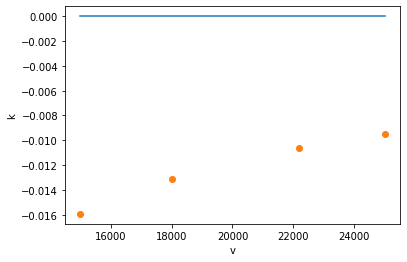

r2 =  0.9996689290237369
The curve (k= -231.66869527529707  * v** -104986.00354314786 ) represent the data reasonably well.


In [ ]:
# Q5 Answer
def sr_func(a, x, y):
  """
  Calculates the total regression error

  sr_func(a, x, y)
  Returns the total regression error
  Input:
    a: array of regression parameters
    x : the independant variable data
    y : the dependant variable data
  Output:
    sr: total regression error
  """    
  y_reg = (a[0]/x) + (a[1]/x**2)      
  sr = np.sum((y - y_reg)**2)  # total regression error
  return sr

p=np.array([0.985, 1.108, 1.363, 1.631])
v=np.array([25000, 22200, 18000, 15000])
k=((p*v)/(82.05*303)-1)

f = lambda a1, v1, F1: sr_func(a1, v1, F1)
a0 = [1,1]  # inital guess for "a" array (consistent with the shape of a)

# - fmin is used for multi-variate optimization to minimize the total regression error
# - f is a lambda function to the sr_func which returns the total regression error
# - a0 is the initial guess which is consistent with the shape of a
# - the data v, F are passed to fmin as tuples using the args input aurgument
#    fmin passes these parameters to the lambda function which then
#    passes them to our sr_func function. The order in which 
#    the data is passed is important. Here, we consistently passed v and then F to all functions.
# - fmin returns "a" that is the array of regression parameters
a = fmin(f, a0, args=(v, k), xtol = 1e-6) 

print('Regression parameters: a=', a)
# Creating the plot
vp = np.linspace(np.min(v),np.max(v))  # generating v and k with higher resolution to plot
kp = a[0] * vp**a[1]
plt.plot(vp,kp,'-')
plt.plot(v,k,'o')
plt.xlabel('v')
plt.ylabel('k')
plt.show();
# Calculating r2
Sr = sr_func(a, v, k)
St = np.sum((k - np.mean(k))**2)
r2 = (St-Sr)/St
print('r2 = ', r2)
print('The curve (k=',a[0],' * v**',a[1], ') represent the data reasonably well.')
